In [21]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
airFile = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='utf-8', encoding_errors="ignore")

In [3]:
twitterFile = pd.read_csv('Twitter-sentiment-self-drive-DFE.csv', encoding_errors="ignore")

In [4]:
airFile.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [5]:
neutral = airFile[airFile.airline_sentiment == 'neutral'].count()
print(neutral)

_unit_id                        3099
_golden                         3099
_unit_state                     3099
_trusted_judgments              3099
_last_judgment_at               3094
airline_sentiment               3099
airline_sentiment:confidence    3099
negativereason                     0
negativereason:confidence       1014
airline                         3099
airline_sentiment_gold             3
name                            3099
negativereason_gold                0
retweet_count                   3099
text                            3099
tweet_coord                      181
tweet_created                   3099
tweet_id                        3099
tweet_location                  2137
user_timezone                   2128
dtype: int64


<AxesSubplot:title={'center':'0'}>

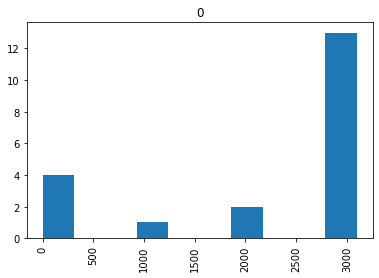

In [6]:
neutral.hist(['neutral'].count)

In [7]:
isDelta = airFile[airFile.airline == 'Delta'].count()

<AxesSubplot:title={'center':'0'}>

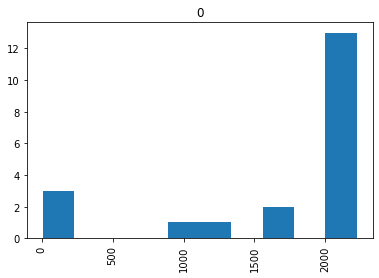

In [8]:
isDelta.hist(['Delta'].count)

In [35]:
uniqueAirlines = airFile['airline'].unique()
print(uniqueAirlines)
type(list(uniqueAirlines))

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


list

In [33]:
neutralNum = airFile.loc[(airFile.airline_sentiment == 'neutral')&\
                         (airFile.airline == 'Virgin America')]["_unit_id"].count()


In [42]:
airline_sentiment_dictionary = {}
for airline in list(airFile['airline'].unique()):
    neutralNum = airFile.loc[(airFile.airline_sentiment == 'neutral')&\
                         (airFile.airline == airline)]["_unit_id"].count()
    positiveNum = airFile.loc[(airFile.airline_sentiment == 'positive')&\
                         (airFile.airline == airline)]["_unit_id"].count()  
    negativeNum = airFile.loc[(airFile.airline_sentiment == 'negative')&\
                         (airFile.airline == airline)]["_unit_id"].count()
#     print(airline, neutralNum, positiveNum, negativeNum)
#     airline_sentiment_dictionary[airline] = \
#     [{'neutral':neutralNum}, {'positive':positiveNum}, {'negative':negativeNum}]
    airline_sentiment_dictionary[airline] = \
    [neutralNum,positiveNum,negativeNum]
print(airline_sentiment_dictionary)

{'Virgin America': [171, 152, 181], 'United': [697, 492, 2633], 'Southwest': [664, 570, 1186], 'Delta': [723, 544, 955], 'US Airways': [381, 269, 2263], 'American': [463, 336, 1960]}


In [45]:
for key, value in airline_sentiment_dictionary.items(): 
    title = key
    labels = ['neutral','positive', 'negative']
    values = [value[0], value[1], value[2]]
    pieChart= go.Figure(data=[go.Pie(labels=labels, values=values, title=title)])
    pieChart.show()

Research Questions

Q: Which airlines are doing a good job capturing customer satisfaction? 
A: United Airlines. They have 3,822 inputs.

Q: How should American Airlines strategically differentiate themselves in the coming year? What opportunities do they have? 
A: American Airlines should plan to increase customer satisfcation, try to keep flights on time and take care not to loose or damage luggage.  

Q: How should Southwest Airlines strategically differntiate themselves in the coming year? What opportunities do they have? 
A: Southwest Airlines should plan to shorten the length of time that customers stand in line as this was there number one complaint. Additionally, they should focus on cancelling flights less and increasing their customer service.

In [ ]:
twitterFile.head()

array([[<AxesSubplot:title={'center':'sentiment:confidence'}>]],
      dtype=object)

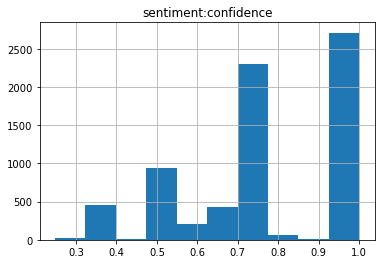

In [15]:
twitterFile.hist('sentiment:confidence')

Research Questions

Q: What are some of the primary concerns about self-driving cars based on the dataset?
A: Many are worried about the safety while others believe it is the future. 

Q: What is the public sentiment like for self-driving cars?
A: The average is 0.7747